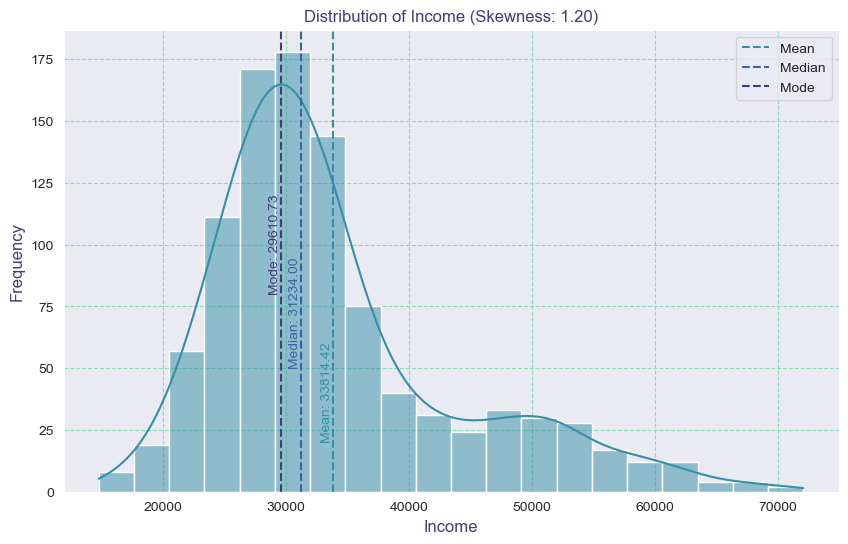

In [93]:
"""
Skewness
========
Skewness is a statistical measure that describes the asymmetry of the
probability distribution of a real-valued random variable about its mean.
It indicates whether the data points are concentrated more on one side of
the mean than the other. Here are a few real-world examples where understanding
skewness in data is important:

1. Income Distribution:
-----------------------
In economics, income distribution is often skewed to the right. This means
that while most people have lower incomes, there are a few individuals or
households with significantly higher incomes, leading to a long right tail
in the income distribution curve. Understanding this skewness helps
policymakers in designing tax policies, social welfare programs, and
understanding economic inequality.
"""

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

# generate sample income data in usd
np.random.seed(0)  # for reproducibility

# combine two datasets to create a positive skewness
income_data = np.concatenate(
    (
        np.random.normal(loc=30000, scale=5000, size=800),
        np.random.normal(loc=50000, scale=8000, size=200),
    )
)

# create a DataFrame
df = pd.DataFrame({"Income": np.round(income_data, 2)})

# calculate mean and median
mean_income = df["Income"].mean()
median_income = df["Income"].median()

# calculate kde to find mode
kde = ss.gaussian_kde(df["Income"])
density = kde(df["Income"])
mode_index = np.argmax(density)
mode_income = df["Income"][mode_index]
mode_income

# calculate skewness
skewness = df["Income"].skew()

# set seaborn style and palette for color scheme
sns.set_style("dark")
palette = sns.color_palette("mako")

# setup colors for mean, median and mode
mean_color = palette[3]
median_color = palette[2]
mode_color = palette[1]

# setup other colors
text_color = palette[1]
hist_color = palette[3]
grid_color = palette[5]

# visualize the distribution of income
plt.figure(figsize=(10, 6))
sns.histplot(df["Income"], kde=True, color=hist_color, bins=20)
plt.axvline(mean_income, color=mean_color, linestyle="--", label="Mean")
plt.axvline(median_income, color=median_color, linestyle="--", label="Median")
plt.axvline(mode_income, color=mode_color, linestyle="--", label="Mode")

# add vertical labels
plt.text(
    mean_income,
    20,
    f"Mean: {mean_income:.2f}",
    rotation=90,
    verticalalignment="bottom",
    horizontalalignment="right",
    color=mean_color,
)

plt.text(
    median_income,
    50,
    f"Median: {median_income:.2f}",
    rotation=90,
    verticalalignment="bottom",
    horizontalalignment="right",
    color=median_color,
)

plt.text(
    mode_income,
    80,
    f"Mode: {mode_income:.2f}",
    rotation=90,
    verticalalignment="bottom",
    horizontalalignment="right",
    color=mode_color,
)

plt.title(f"Distribution of Income (Skewness: {skewness:.2f})", color=text_color)
plt.xlabel("Income", color=text_color, fontsize=12)
plt.ylabel("Frequency", color=text_color, fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", color=grid_color)
plt.show()